# 군집 분석
- 정의 : 군집 분석은 각 개체에 대해 관측된 여러 개의 변수 값들로부터 n개의 개체를 유사한 성격을 가지는 몇개으 군집으로 집단화하고, 형성된 군집들의 특성을 파악하여 군집들 사이의 관계를 분석하는 다변량분석 기법이다. 
- 유사성에만 기초하여 군집 형성
- 방법 : 계층적 군집, 분리군집, 밀도-기반군집, 격자-기반 군집, 커널-기반 군집, SOM 방법 등이 있다. 
- 순서
    - -1. 거리를 잰다 
    - -2. 결합하는 방법을 선택
    - -3. 군집을 평가한다. 


### 1. 계층적 군집
- 가장 유사한 개체를 묶어 나가는 과정을 반복하여 원하는 개수의 군집응ㄹ 형성하는 방법
- 계통 또는 덴드로그램의 형태로 결과가 주어지며, 각 개체는 하나의 군집에만 속함
- 개체간의 유사성(또는 거리)에 대한 다양한 정의 가능
- 군집간의 연결법에 따라 군집의 결과가 달라짐

- 방법 : 병합적 방법(agglomerative), 분할적 방법(divisive)


#### R에서 계층적군집 수행하기
- 병합적 방법 : hclust{stats}, {cluster} 패키지의 agnes(), mclust()
- 분할적 방법 : {cluster} 패키지의 diana(), mona()

#### -1. 병합적 방법
- 실습 - hclust()함수를 이용하여 계층적 군집 수행
- 순서
    - -1. 거리를 잰다 - dist()
    - -2. 결합하는 방법을 선택
    - -3. 군집을 평가한다. 

USArrests자료는 미국 50개 주에서 1973년에 발생한 폭행, 살인, 강간 범죄를 주민 100,000명 당 체포된 사람의 통계 자료이다.
해당 자료를 이용하여 계층적 군집을 수행해보자 

##### 1. hclust() 함수로 군집화해보기
- dist()는 거리(또는 비유사성 - 거리는 유사성과 반대개념)행렬을 제공하는 함수로, method= 옵션으로 통해 방법 선택 가능
- method option에는 "euclidean", "maximum", "mangattan", "binary", "minkowsky" 등이 있다. 
- hclust() 함수는 계층적 군집 분석을 수행하는 함수, method= 옵션을 통해 병합 방법을 지정
- method option에는 "ward", "single", "complete", "average", "centroid"가 있다. 

In [3]:
data(USArrests)
str(USArrests)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


In [4]:
# Step1. 거리설정 - dist 함수, euclidean 옵션으로 거리 설정
d <- dist(USArrests, method="euclidean")

In [5]:
# Step2. 군집분석 수행 - hclust()
fit <- hclust(d, method="ave")

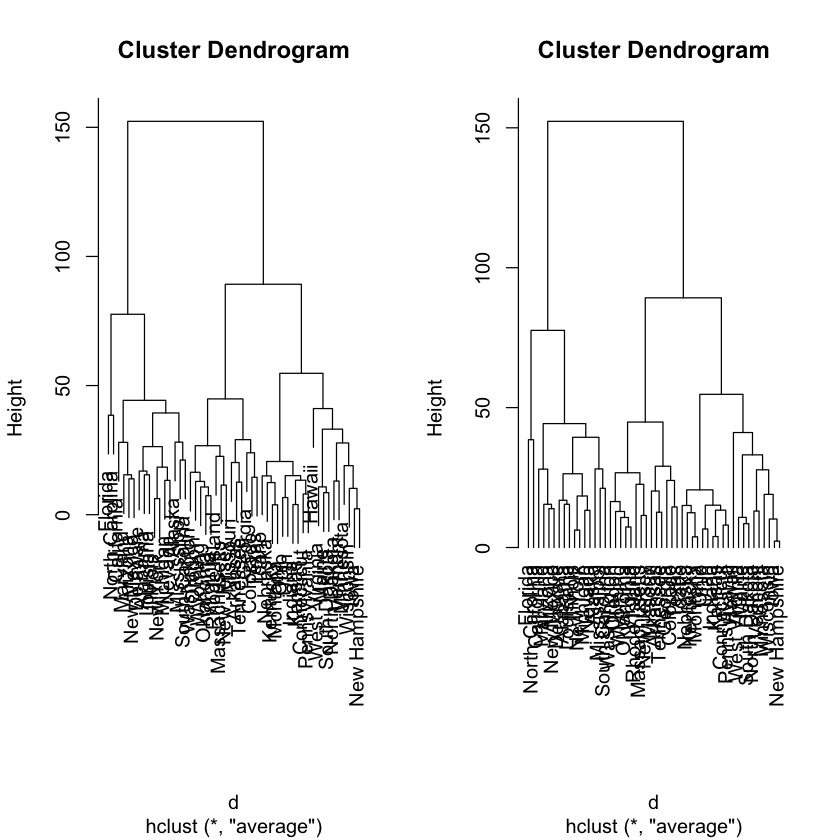

In [6]:
# Step3. 평가 및 시각화
par(mfrow=c(1,2))
plot(fit)
plot(fit, hang= -1)
par(mfrow=c(1,1))

In [7]:
# cutree()로 tree 높이(h)나 그룹의 수(k) 조정하기 
groups <- cutree(fit, k=6) #그룹의 수를 6개로 조정
groups

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              4              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             5              3              1              3              5 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              5              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             6              1              5              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              5              6 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              4              5              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             6              6              3              6              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             5              2              2              3              5 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             6              6              5              5              6

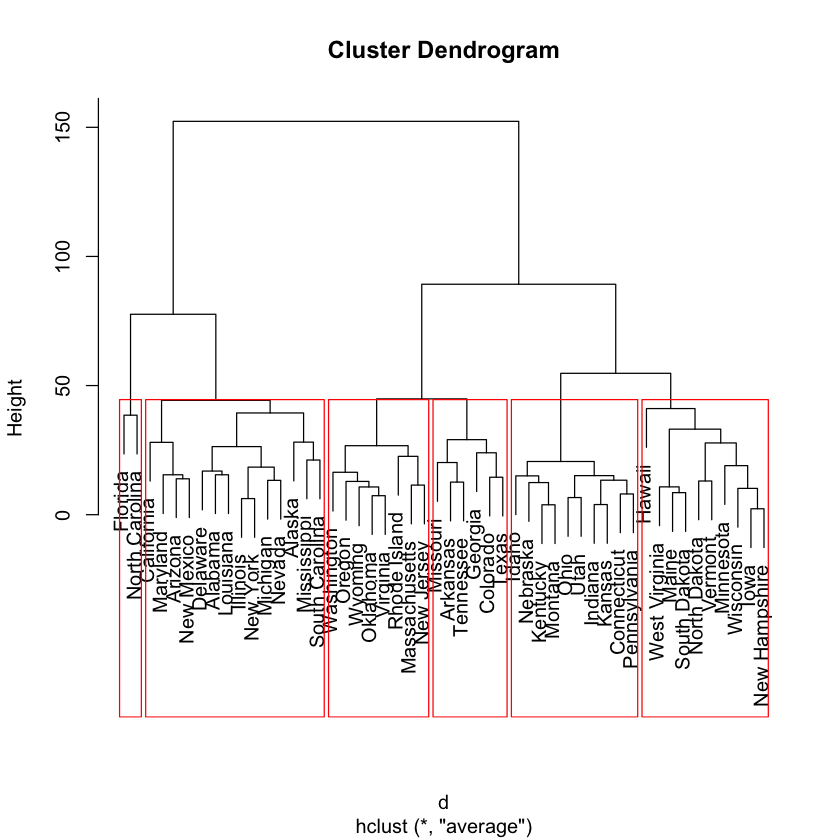

In [8]:
# rect.hclust()함수 1 - 각각의 그룹을 사각형으로 구분지어 나타냄
plot(fit)
rect.hclust(fit, k=6, border="red")

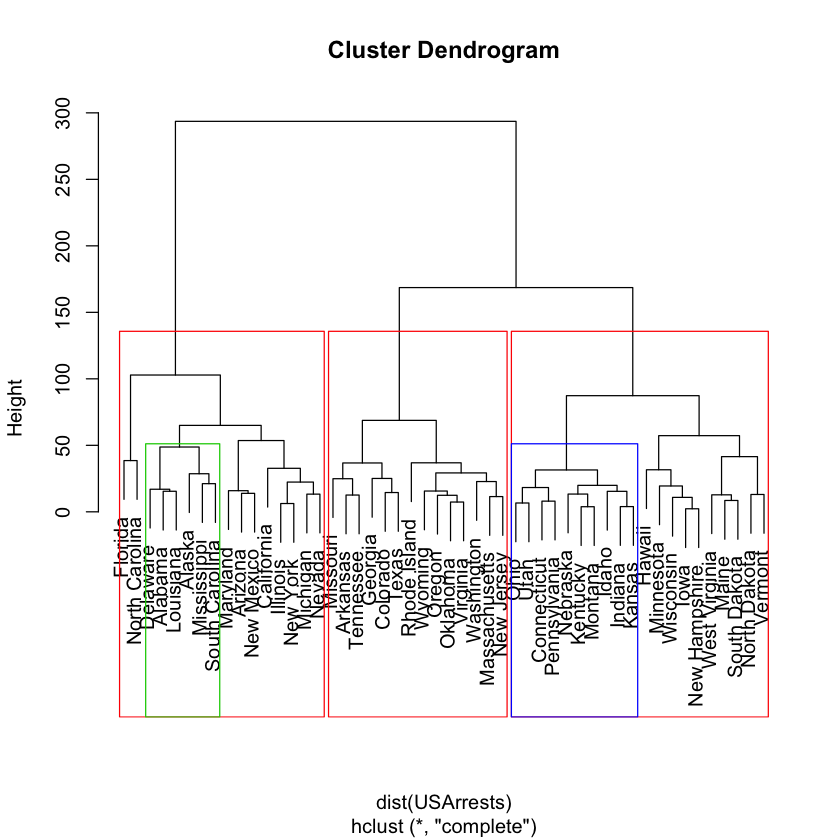

In [13]:
# rect.hclust()함수 2 - 높이(h)와 위치(which)를 이용하여 그룹핑
hca <- hclust(dist(USArrests))
plot(hca)
rect.hclust(hca, k = 3, border = "red") # 3개 그룹으로 1차 그룹핑하여 박스를 쳐라 
rect.hclust(hca, h =50, which = c(2,7), border = 3:4) # 높이(h) 50을 기준으로 그룹핑 했을 때, 2번째 7번째 그룹에 박스를 쳐라

##### 2. agnes() 함수로 군집화해보기
- hclust() 함수는 계층적 군집 분석중 병합적 방법을 수행하는 함수, metric= 옵션을 통해 병합 방법을 지정
- metric option에는 "euclidean", "manhattan"등이 있다.
- daisy()함수를 이용하여 거리 계산할 수 있다. 

In [14]:
library(cluster)
agn1 <- agnes(USArrests, metric = "manhattan", stand= TRUE)
agn1

Call:	 agnes(x = USArrests, metric = "manhattan", stand = TRUE) 
Agglomerative coefficient:  0.7584535 
Order of objects:
 [1] Alabama        Tennessee      Georgia        Louisiana      Mississippi   
 [6] South Carolina North Carolina Alaska         Arizona        Maryland      
[11] New Mexico     Michigan       Illinois       New York       Texas         
[16] Florida        California     Colorado       Nevada         Arkansas      
[21] Idaho          Nebraska       Kentucky       Montana        Indiana       
[26] Kansas         Oklahoma       Ohio           Pennsylvania   Virginia      
[31] Wyoming        Delaware       Missouri       Oregon         Washington    
[36] Connecticut    Utah           Hawaii         Massachusetts  New Jersey    
[41] Rhode Island   Iowa           New Hampshire  Maine          Minnesota     
[46] Wisconsin      North Dakota   Vermont        South Dakota   West Virginia 
Height (summary):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3718  1.

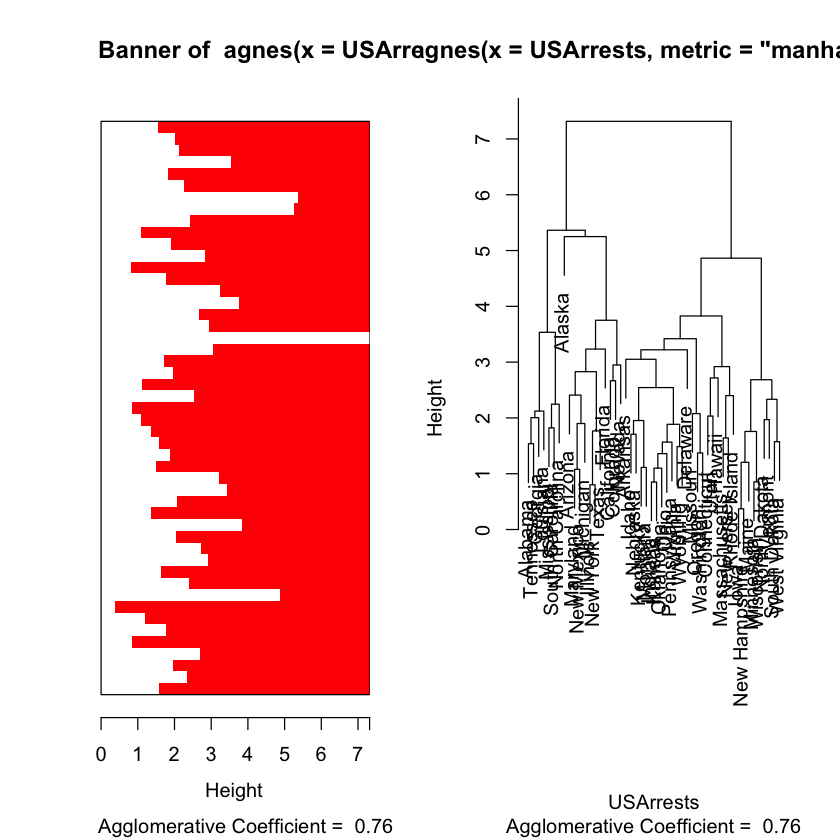

In [15]:
par(mfrow=c(1,2))
plot(agn1)

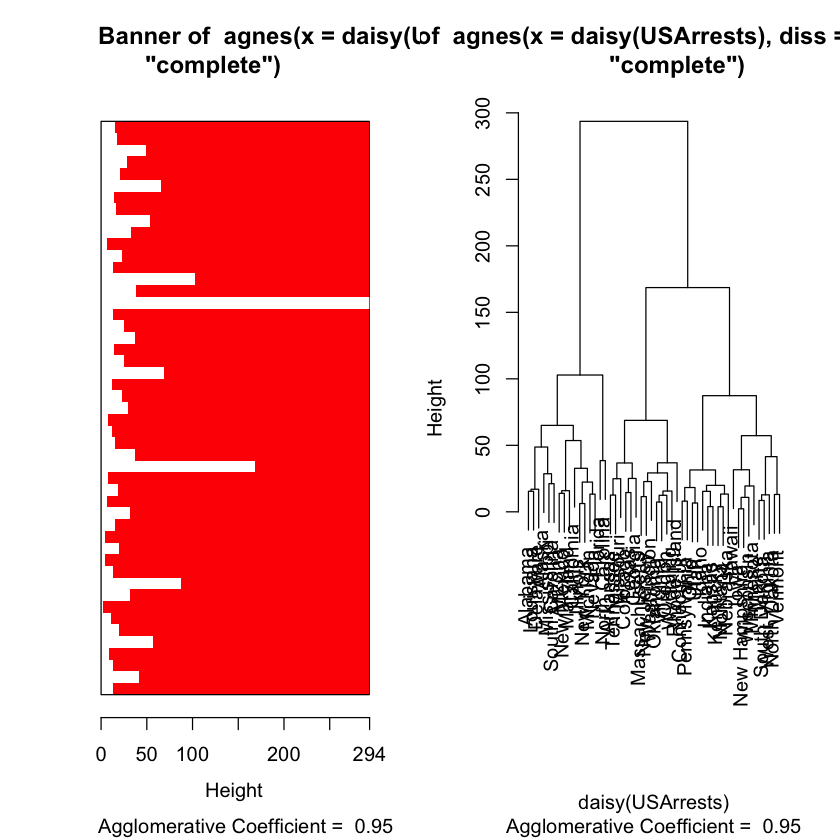

In [19]:
agn2 <- agnes(daisy(USArrests), diss=TRUE, method="complete")
par(mfrow=c(1,2))
plot(agn2)

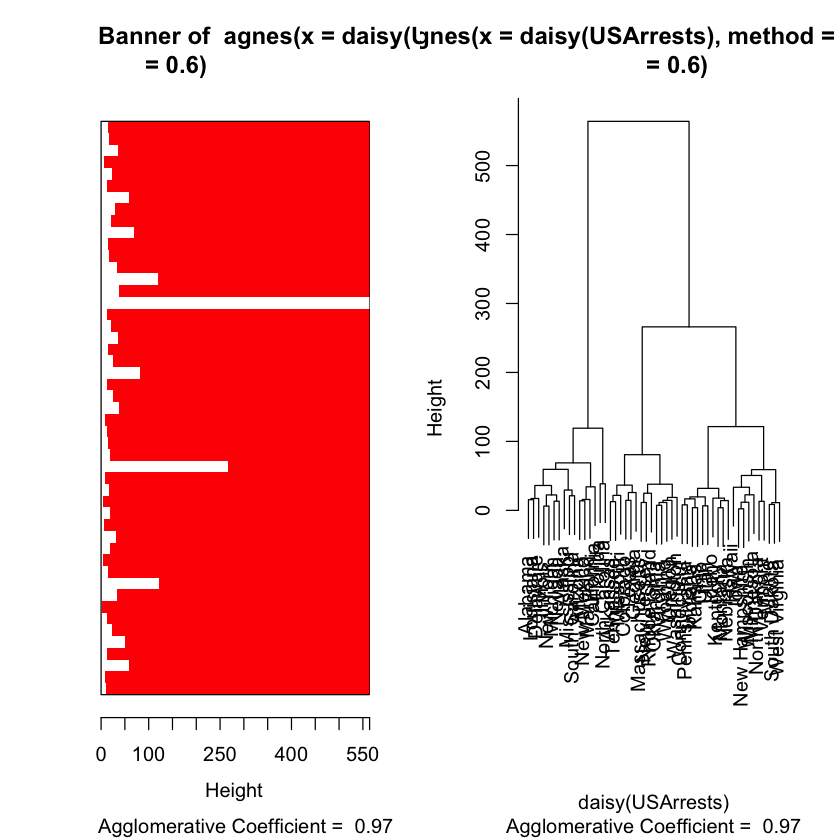

In [20]:
agn3 <- agnes(daisy(USArrests),method="flexible", par.meth=0.6)
par(mfrow=c(1,2))
plot(agn3)

### 2. k- 평균 군집
- k- 평균군집(k-means clustering)은 원하는 군집 수만큼(k개) 초기값을 지정하고, 각 개체(데이터)를 가까운 초기값에 할당하여 군집을 형성한 뒤, 각 군집의 평균을 재계산하여 초기값을 갱신한다. 갱신된 값에 대해 위의 할당과정을 반복하여 k개의 최종군집을 형성한다.
- k-평균군집에서 군집의 수(k)는 미리 정해 주어야하며, k-개의 초기 중심값음 임의로 선택될 수있으나, 자료값 중에서 무작위로 선택하는 것이 보다 편리함. (초기값에 따라 군집의 결과가 달라질 수 있다.)
- k-평균군집은 군집의 매 단계마다 군집 중심으로부터의 오차제곱합을 최소화하는 방향으로 군집을 형성해나가는(부분 최적화를 수행하는) 탐욕적(greedy) 알고리즘으로 간주 될 수 있으며, 안정된 군집은 보장하나 전체적으로 최적이라는 것은 보장하지 못한다. 

##### 알고리즘
- 단계1. 초기(군집의) 중심으로 k개의 객체를 임의로 선택한다. 
- 단계2. 각 자료를 가장 가까운 군집 중심에 할당한다. 
- 단계3. 각 군집 내의 자료들의 평균을 계산하여 군집의 중심을 갱신한다. 
- 단계4. 군집 중심의 변화가 거의 없을 때(또는 최대 반복수)까지 단계2와 단계3을 반복한다.

##### 한계
- 평균 등 거리 계산에 기반하므로 모든 변수가 연속적이어야 한다. 
- 잡음이나 이상값에 영향을 많이 받는다. 
- 볼록한 형태가 아닌 군집(예를 들어, U-형태의 군집)이 존재할 경우 성능이 떨어진다. 

### 예제 1. kmeans( ) 함수를 이용하여 k-평균군집을 수행
- 분석에 사용되는 자료 패키지 {rattle}에서 제공하는 178개 이탈리안 와인에 대해 13가지의 화학적 성분을 측정한 자료

In [19]:
data(wine, package="HDclassif")
head(wine)
str(wine)
colnames(wine) <- c("Type","Alcohl","Malic","Ash","Alcalinity",
                    "Magnesium","Phenols","Flavanoids","Nonflavanoids",
                    "Proanthocyanins","Color","Hue","Dilution","Proline")


class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


'data.frame':	178 obs. of  14 variables:
 $ class: int  1 1 1 1 1 1 1 1 1 1 ...
 $ V1   : num  14.2 13.2 13.2 14.4 13.2 ...
 $ V2   : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ V3   : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ V4   : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ V5   : int  127 100 101 113 118 112 96 121 97 98 ...
 $ V6   : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ V7   : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ V8   : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ V9   : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ V10  : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ V11  : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ V12  : num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ V13  : int  1065 1050 1185 1480 735 1450 1290 1295 1045 1045 ...


##### 군집의 수 미리 정해주기

In [20]:
wssplot <- function(data, nc=15, seed=1234){
            wss <- (nrow(data)-1)*sum(apply(data,2,var))
            for(i in 2:nc){
                set.seed(seed)
                wss[i] <- sum(kmeans(data, centers=i)$tot.withiness)}
            plot(1:nc, wss, type="b", xlab="Number of Clusters",
                 ylab="Within groups sum of squares")}

##### 표준화
- 변수의 측정 단위가 매우 다르므로 군집 분석을 수행하기전에 scale() 함수를 이용하여 표준화
- 군집의 수 3에서 오차가 크게 감소함

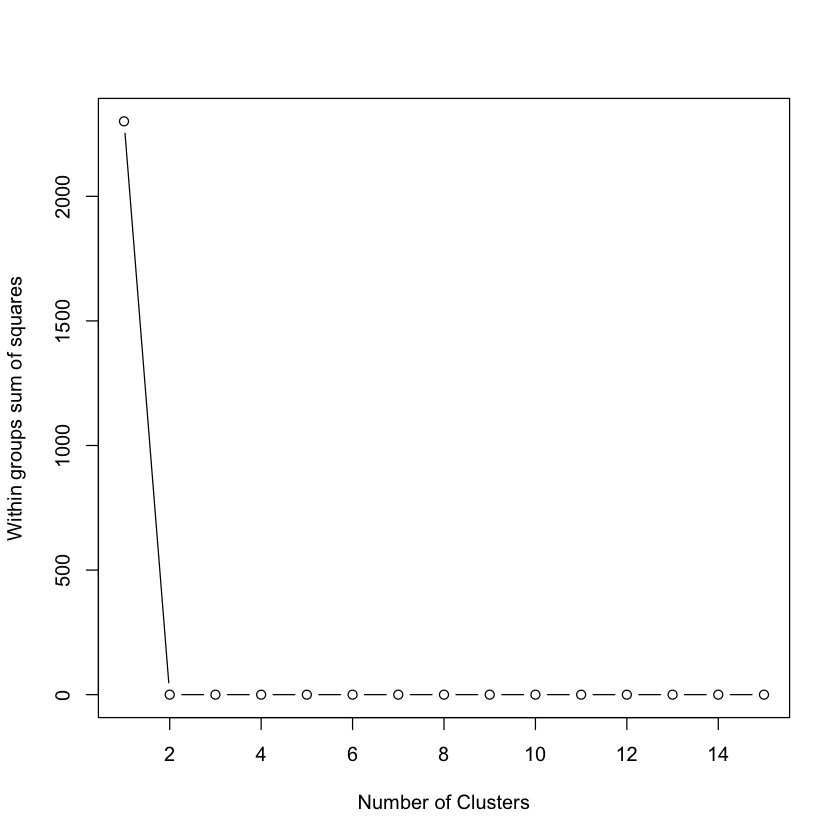

In [21]:
sca_df <- scale(wine[-1]) 
wssplot(sca_df)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


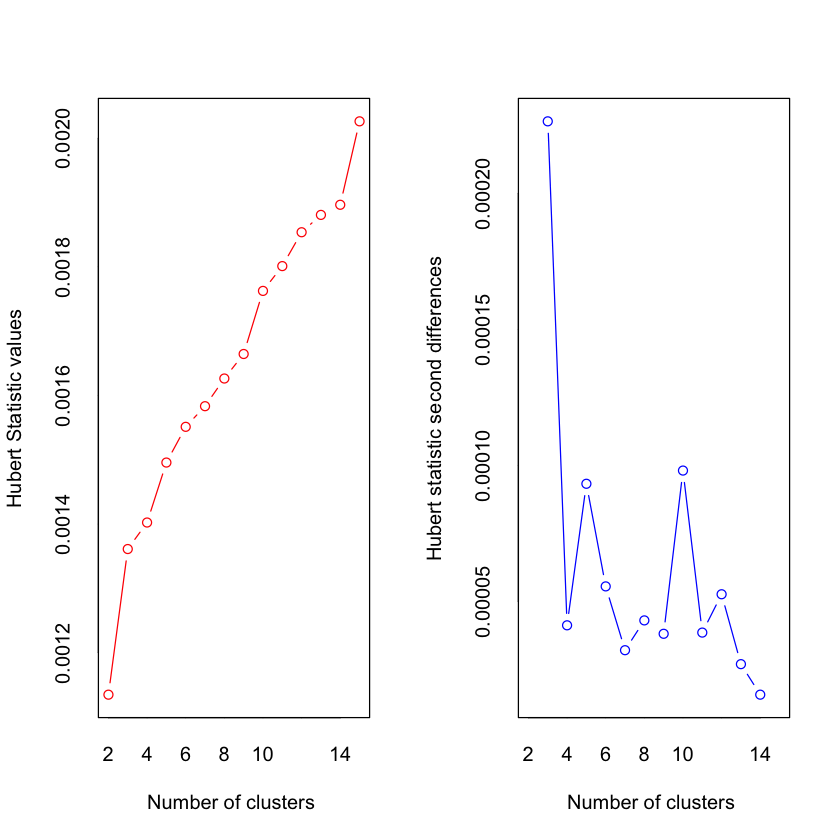

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 15 proposed 3 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 1 proposed 12 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 



 0  1  2  3 10 12 14 15 
 2  1  4 15  1  1  1  1 

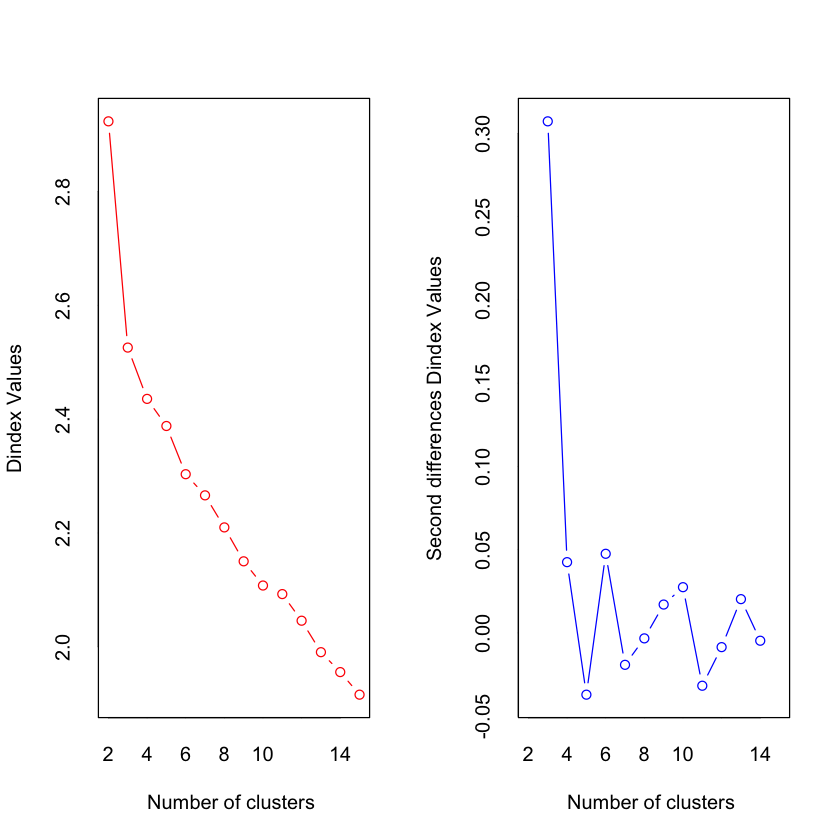

In [22]:
set.seed(1234)
library(NbClust)
nc <- NbClust(sca_df, min.nc=2, max.nc=15, method = "kmeans")
table(nc$Best.n[1,])

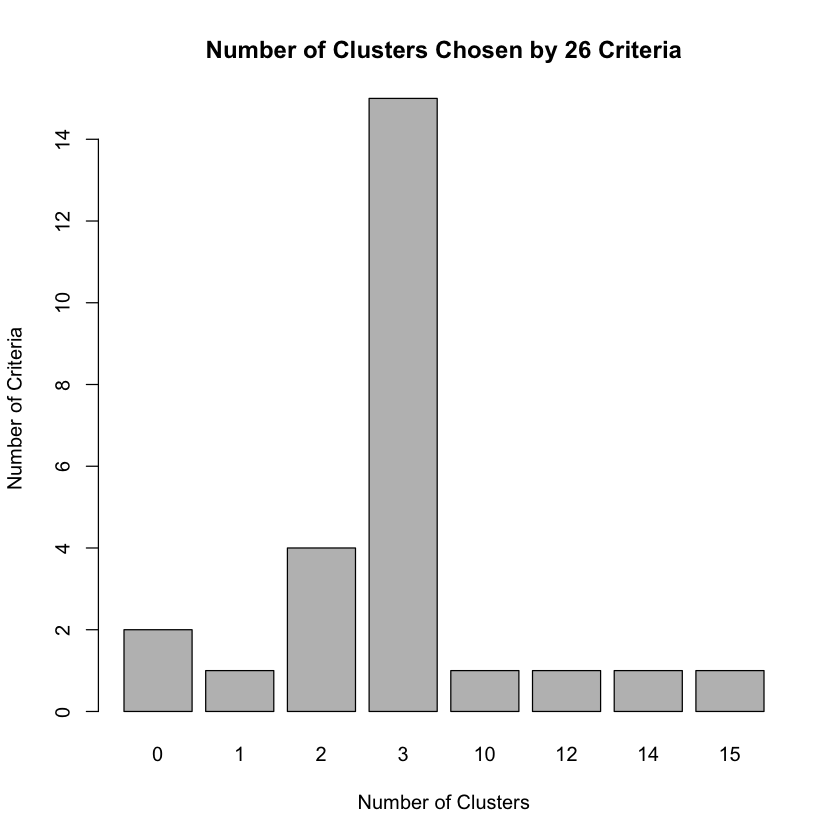

In [23]:
barplot(table(nc$Best.n[1,]),
        xlab = "Number of Clusters", ylab = "Number of Criteria",
        main = "Number of Clusters Chosen by 26 Criteria")

##### 군집의 수(k)를 3으로 하여 kmeans ( ) 수행

In [24]:
set.seed(1234)
fit.km<- kmeans(sca_df, 3, nstart=25)
fit.km$size

[1] 62 65 51

In [25]:
fit.km$centers

,Alcohl,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,0.8328826,-0.3029551,0.3636801,-0.6084749,0.57596208,0.88274724,0.97506900,-0.56050853,0.57865427,0.1705823,0.4726504,0.7770551,1.1220202
2,-0.9234669,-0.3929331,-0.4931257,0.1701220,-0.49032869,-0.07576891,0.02075402,-0.03343924,0.05810161,-0.8993770,0.4605046,0.2700025,-0.7517257
3,0.1644436,0.8690954,0.1863726,0.5228924,-0.07526047,-0.97657548,-1.21182921,0.72402116,-0.77751312,0.9388902,-1.1615122,-1.2887761,-0.4059428


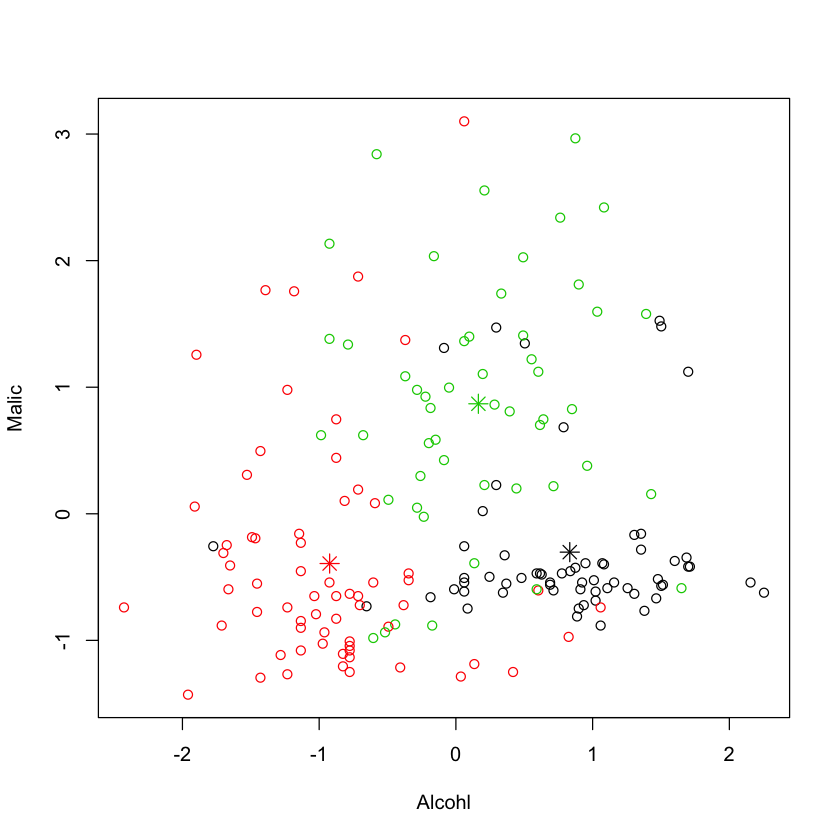

In [26]:
plot(sca_df, col=fit.km$cluster)
points(fit.km$center, col=1:3, pch=8, cex=1.5)

##### 각 군집별 변수의 요약값

In [27]:
aggregate(wine[-1], by=list(cluster=fit.km$cluster), mean)

cluster,Alcohl,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,13.67677,1.997903,2.466290,17.46290,107.96774,2.847581,3.0032258,0.2920968,1.922097,5.453548,1.0654839,3.163387,1100.2258
2,12.25092,1.897385,2.231231,20.06308,92.73846,2.247692,2.0500000,0.3576923,1.624154,2.973077,1.0627077,2.803385,510.1692
3,13.13412,3.307255,2.417647,21.24118,98.66667,1.683922,0.8188235,0.4519608,1.145882,7.234706,0.6919608,1.696667,619.0588


##### k-평균군집의 결과에 대한 정오분류표 
- 행 - 실제값 / 열 - 예측값


In [28]:
ct.km <- table(wine$Type, fit.km$cluster)
ct.km

   
     1  2  3
  1 59  0  0
  2  3 65  3
  3  0  0 48

##### 실제 와인 종류와 군집간의 일치도

In [29]:
library(flexclust)
randIndex(ct.km)

ARI 
0.897495

## 예제 2. kcca( )함수 이용하여 k=평균군집 수행
- Nclus는 패키지에서 제공하는 데이터로써, 서로 다른 4개의 이변량 정규분포로 부터 발생된 난수로 구성된 자료이다.

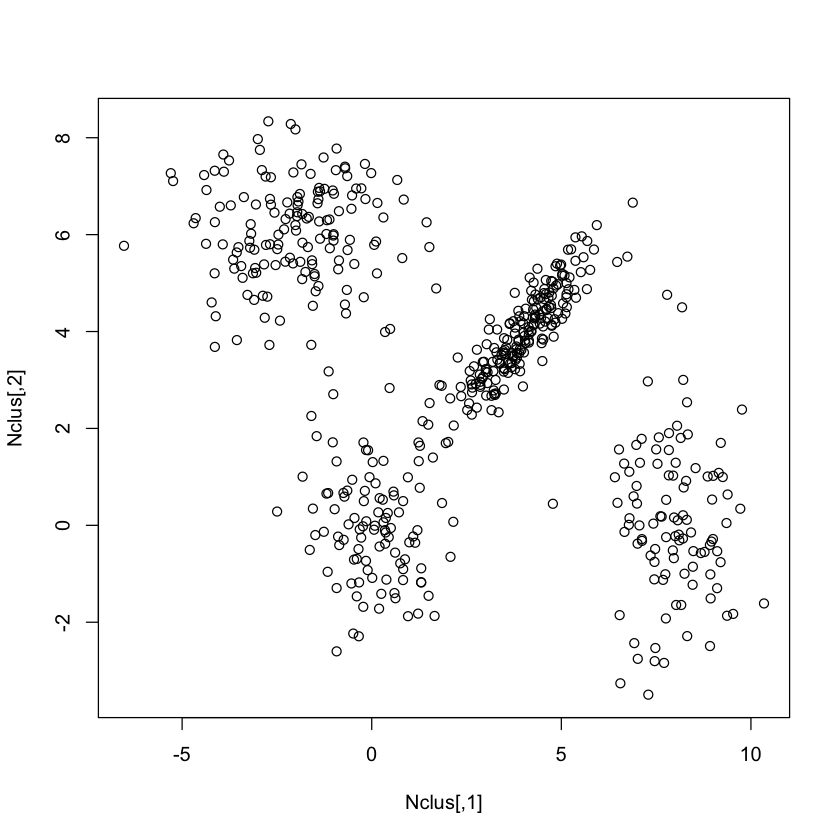

In [30]:
library(flexclust)
data("Nclus") # 서로 다른 4개의 이변량 정규분포로부터 발생된 난수로 구성된 자료
plot(Nclus)

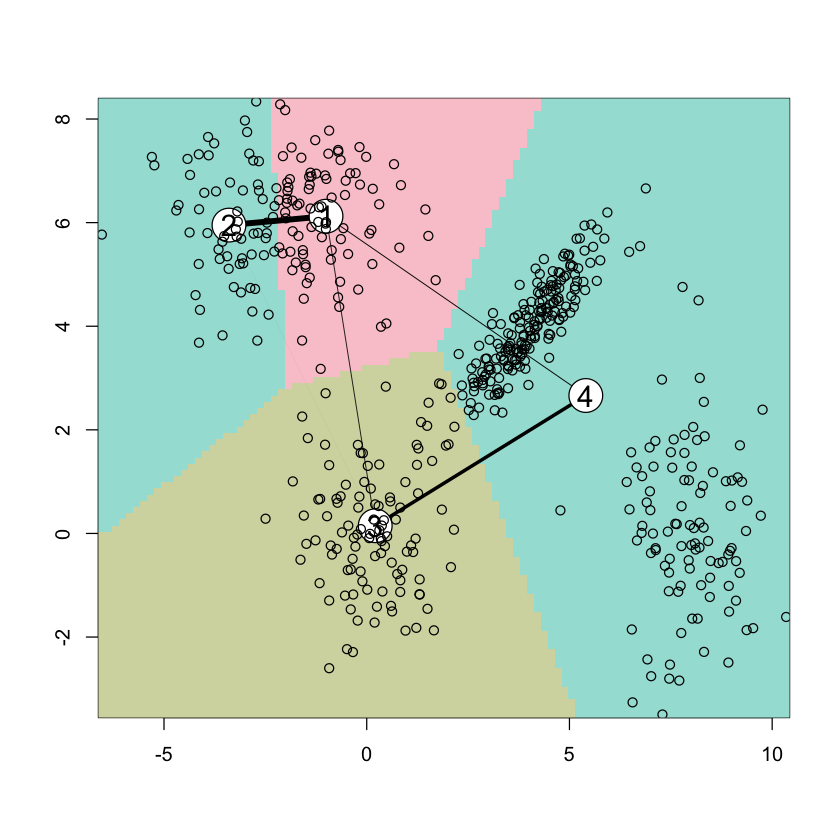

In [31]:
cl <- kcca(Nclus, k=4, family = kccaFamily("kmeans"))
image(cl)
points(Nclus)


####  barplot() 그려보기
- 각 군집의 변수별 중심이 전체 군지의 중심으로부터 얼마나 벗어나 있는지를 나타냄
- 군집안에서 속성의 개수 만큼 barplot을 그린다.
- 해석
    - 클러스터 2의 분포는 0~4까지 흩어짐
    - 클러스터 3의 분포는 0에 상당히 밀집되어 있음
    - 클러스터 4의 분포 첫번 째 속성이 -값, 속성2는 범위가 넓다. 

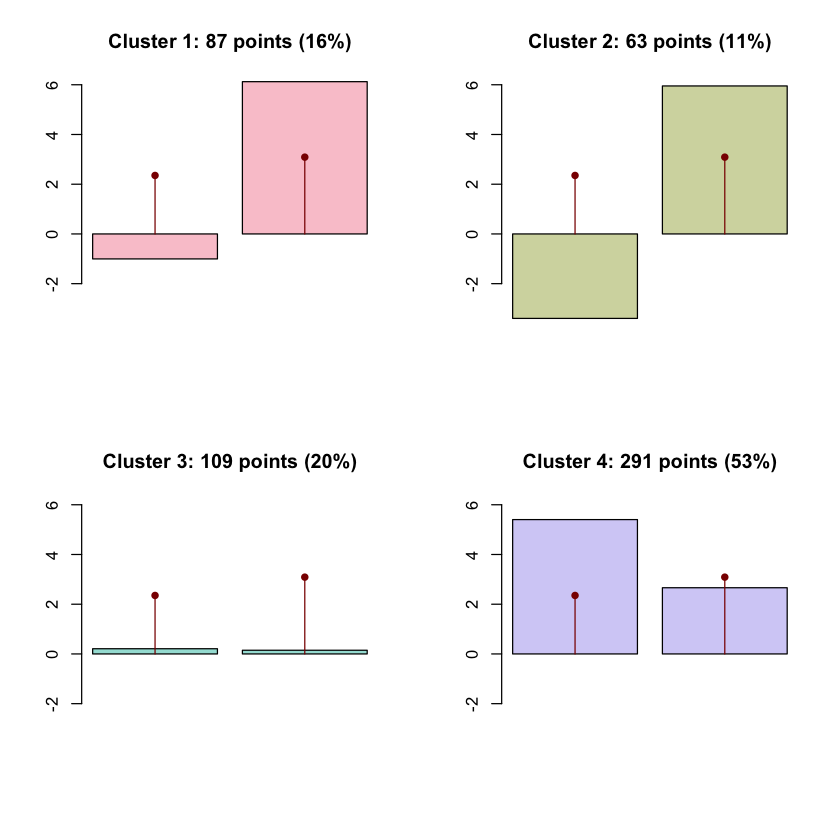

In [32]:
barplot(cl)

#### stripes() 그려보기
- 줄무늬를 이용하여 각 군집내의 자료들이 해당 군집의 평균으로부터 얼마나 떨어져 있는지를 나타냄
- 중심으로 부터 얼마나 조밀한가, 밀도가 높은가
- 해석
    - 첫번째 군집은 0을 중심으로 모여 있다.
    - 두번째는 0~1사이에 몰려 있다. 응집력이 가장 높다. 


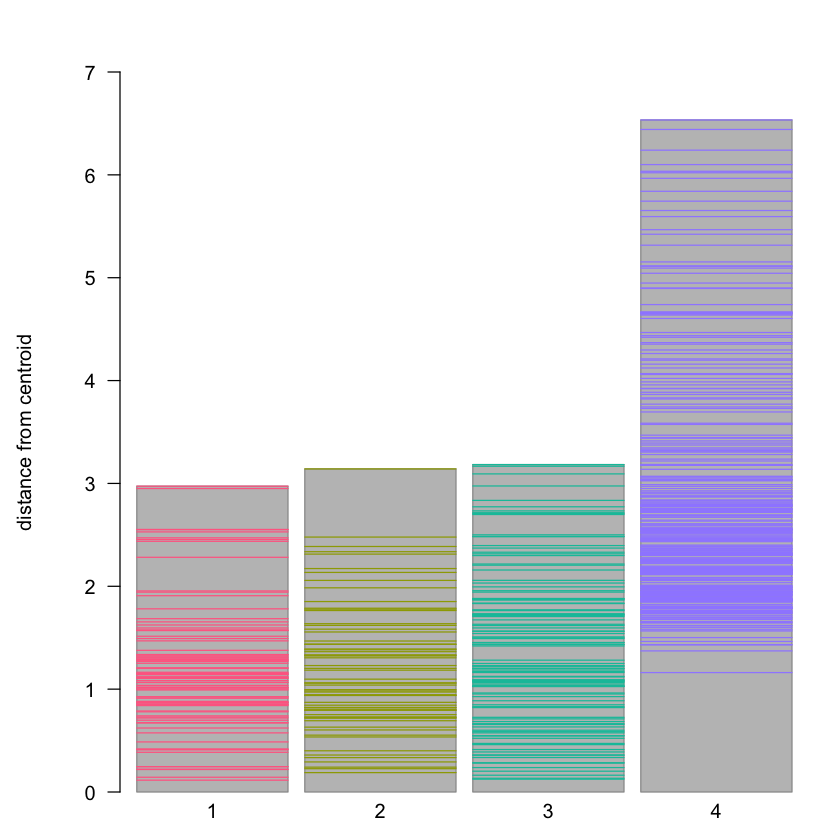

In [33]:
stripes(cl)

## 예제 3. cclust( )함수 이용하여 k-평균군집 수행

In [34]:
library(cclust)
cl.1 <- cclust(Nclus, 4, method="kmeans")



Attaching package: ‘cclust’

The following object is masked from ‘package:flexclust’:

    cclust



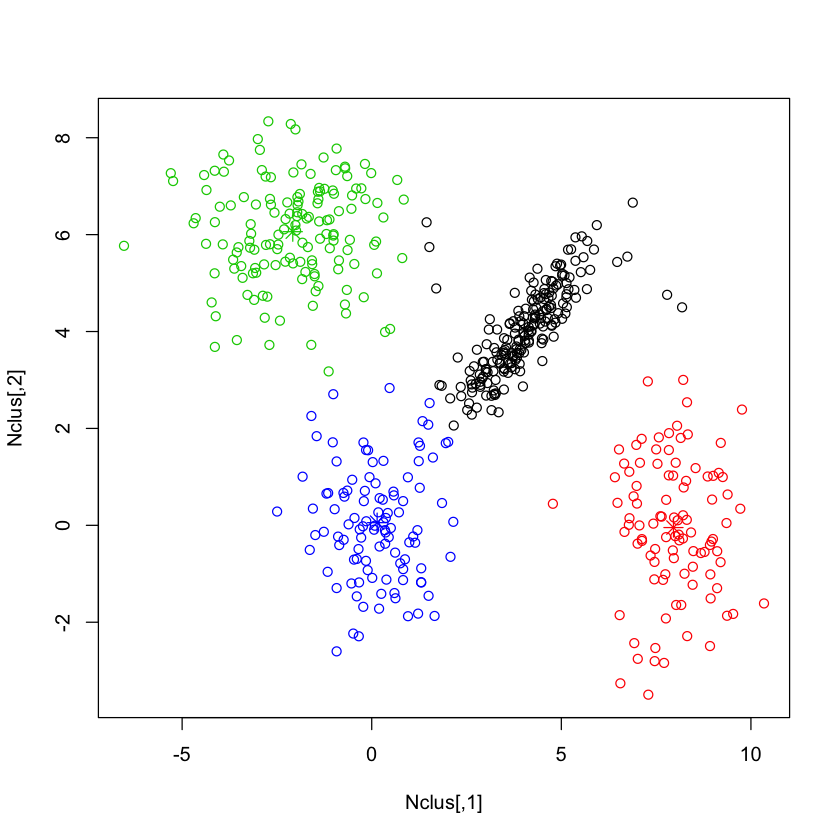

In [35]:
plot(Nclus, col=cl.1$cluster) # cluster가 이미 색별로 되어 있음
points(cl.1$centers, col = 1:4, pch =8, cex=1.5)

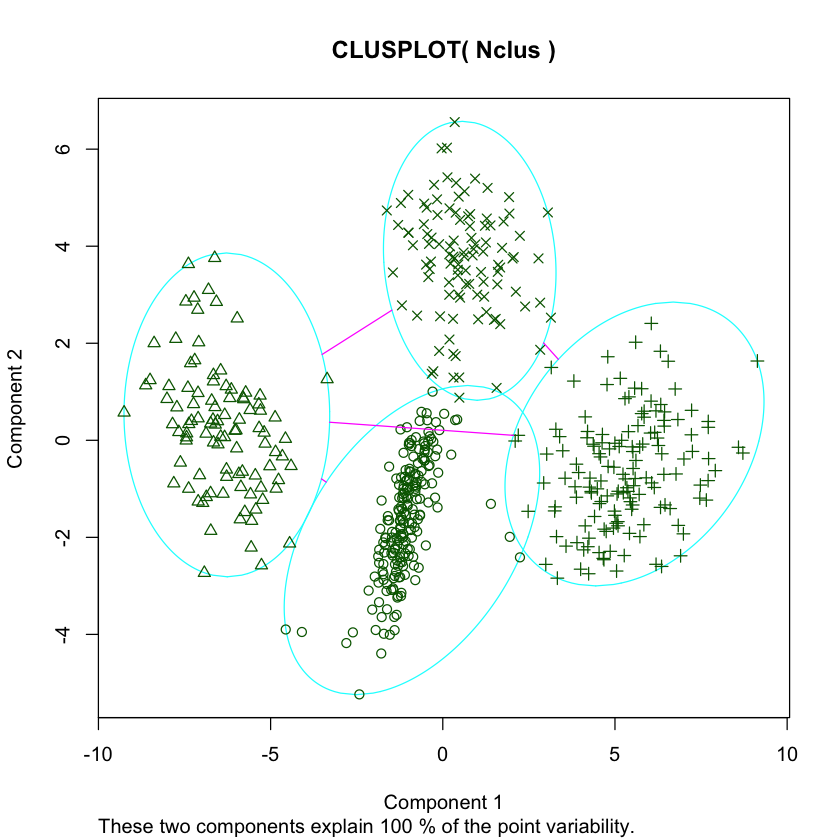

In [36]:
library(cluster)
clusplot(Nclus, cl.1$cluster)